# Worksheet: Dimension Reduction

Besides PCA, there are some other dimension reduction techniques. In this worksheet, you will learn kernel PCA and locally linear embeddings (LLE). There are some other dimension reduction techniques, such as Johnson-linderstrauss lemma, t-SNE, and etc.

Feel free to discuss with your classmates or ask your TA for help.

**Question 1: Please read this [article](https://neptune.ai/blog/dimensionality-reduction) and summarize what is the curse of dimensionality?**

Answer: an increase in the number of features (or dimensions) needed to estimate a function grows exponentially, making it difficult to achieve accurate results.


**Question 2: Please read the article given in Question 1 and this [article](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d) and then summarize what is the kernel trick/method?**

Answer:
The kernel trick is a technique used in machine learning, especially with support vector machines (SVMs), to handle non-linear data by implicitly mapping it into a higher-dimensional space without explicitly performing the transformation. Instead of calculating the coordinates in this higher-dimensional space, the kernel trick uses a kernel function, such as the Gaussian or polynomial kernel, which computes the dot product between data points as if they were in the higher-dimensional space. This approach allows algorithms to separate non-linear data efficiently in a way that would otherwise require complex computations, enabling more accurate classifications and regressions without the high computational cost associated with directly mapping data to a higher dimension.

Please read this [article](https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9) which includes an explanation for LLE. You are also recommended to read the first paper on LLE, which is available [here](https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf).

Please run the following code to generate swiss roll dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate swiss_roll dataset

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.0)

# visualize the datapoints
pix = (t-np.min(t))/(np.max(t)-np.min(t)) 
color = np.column_stack( (0.9*pix, 1-pix, 0.2*pix ) )
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=color)

<Figure size 640x480 with 0 Axes>

## Kernel PCA

Search `sklearn.decomposition.KernelPCA` and then implement kernel PCA on swiss roll dataset. Select the first 2 principal components, then visualize them. You should use different color for each point. Color for each point are given above, see `color`.

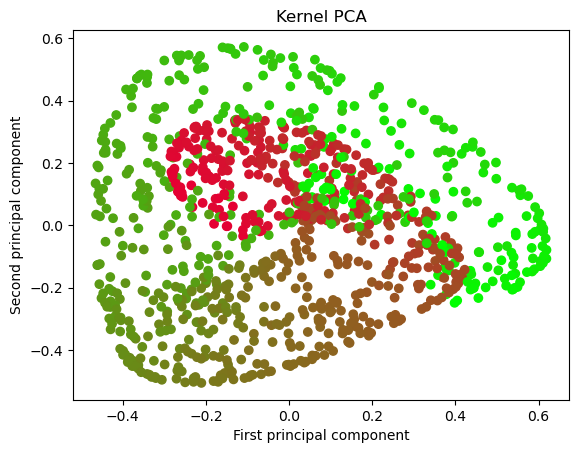

In [3]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with adjusted RBF kernel gamma value
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X_scaled)

# Plot the transformed data in 2D
plt.figure()
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color)
plt.title('Kernel PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

## LLE (locally linear embedding)

Locally Linear Embedding is another powerful nonlinear dimension reduction technique. This algorithm first measures how each training instance linearly relates to its closest neighbors, and then look for a low-dimensional representation of the training set where these local relationships are best preserved.

Search `sklearn.manifold.LocallyLinearEmbedding` and then implement LLE on swiss roll dataset. Reducing the dataset to 2-dimension, and then visualize the reduced dataset. You should use different color for each point. Color for each point are given above, see `color`.

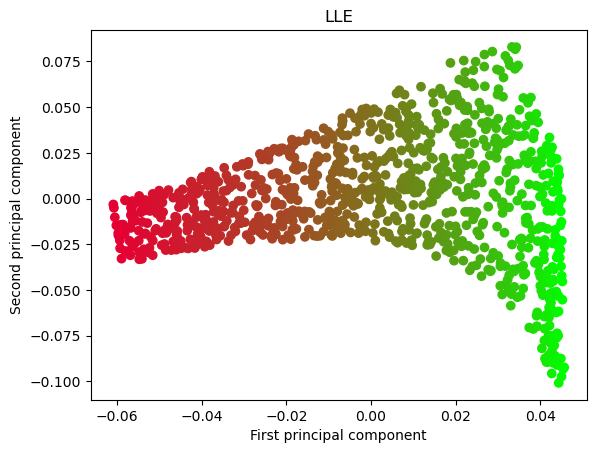

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X)

# Plot the transformed data in 2D
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color)
plt.title('LLE')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

**Question 3: Which dimension reduction technique works better for swiss roll dataset? Kernel PCA or LLE?**
    
Answer: LLE works better as a dimension reduction technique for the given data set, as it presderves local relationships in lower dimension representation rather than projecting data based on a global non-linear transformation